In [1]:
import os
import sys


up1 = os.path.abspath('../../utils/') 
up2 = os.path.abspath('../../models/') 
sys.path.insert(0, up1)
sys.path.insert(0, up2)

In [2]:
from optical_flow_data_gen import DataGenerator
from ucf101_data_utils import get_test_data_opt_flow, get_train_data_opt_flow
from motion_network import getSimonyanOxfordModel
from keras.optimizers import SGD
from matplotlib import pyplot as plt
from keras.optimizers import SGD
import cv2 
import numpy as np
import keras

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
from keras.callbacks import ModelCheckpoint, Callback

def get_callbacks(filepath):
    msave = ModelCheckpoint(filepath, save_best_only=True)
    return [msave]
file_path = "/data/su_buildup/two_stream_part2/data/weights/motion_model_10_class_simonyan.hdf5"
callbacks = get_callbacks(filepath=file_path)

In [4]:
motion_model=getSimonyanOxfordModel((224,224,2), 10, dropout=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 112, 112, 96)      9504      
_________________________________________________________________
activation_1 (Activation)    (None, 112, 112, 96)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 256)       614656    
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 512)       1180160   
__________

In [5]:
from optical_flow_data_gen import DataGenerator
from ucf101_data_utils import get_test_data_opt_flow, get_train_data_opt_flow

training_options = { 'rescale' : 1./255, 
                     'samplewise_center': True, 
                         'samplewise_std_normalization':True,
                            'zoom_range' : 0.2, 
                            'horizontal_flip' : True}

validation_options = { 'rescale' : 1./255,
                     'samplewise_center': True, 
                         'samplewise_std_normalization':True}




params_train = { 'data_dir' : "/data/tvl1_flow",
          'dim': (224,224),
          'batch_size': 128,
          'n_frames': 1,
          'n_frequency': 1,
          'shuffle': True, 
                'n_classes' : 10,
           'validation' : False,
                'enable_augmentation' : True,
               'training_opts' : training_options}

params_valid = { 'data_dir' : "/data/tvl1_flow",
          'dim': (224,224),
          'batch_size':128,
          'n_frames': 1,
          'n_frequency': 1,
          'shuffle': True, 
                'n_classes' : 10,
           'validation' : True,
               'validation_opts' : validation_options}

id_labels_train = get_train_data_opt_flow('../../data/ucf101_splits/trainlist01_small.txt')
labels = id_labels_train[1]
id_test = get_test_data_opt_flow('../../data/ucf101_splits/testlist01_small.txt', \
                       '../../data/ucf101_splits/classInd_small.txt')

training_generator = DataGenerator(*id_labels_train, **params_train)


validation_generator = DataGenerator(id_test[0], id_test[1], **params_valid)

In [6]:
mypotim = SGD(lr=1e-2, momentum=0.9)
motion_model.compile(loss='categorical_crossentropy',
              optimizer=mypotim,
              metrics=['accuracy'])

In [7]:
mod1 = motion_model.fit_generator(generator=training_generator, steps_per_epoch=32, 
                    validation_data=validation_generator, validation_steps=32,
                    use_multiprocessing=True,
                    workers=4, epochs=2,
                    verbose=1)

Epoch 1/2
32/32 [==============================] - 106s 3s/step - loss: 2.4552 - acc: 0.1040 - val_loss: 2.4412 - val_acc: 0.1257
Epoch 2/2
32/32 [==============================] - 34s 1s/step - loss: 2.4426 - acc: 0.1169 - val_loss: 2.4303 - val_acc: 0.1377


In [9]:
mod1 = motion_model.fit_generator(generator=training_generator, steps_per_epoch=32, 
                    validation_data=validation_generator, validation_steps=32,
                    use_multiprocessing=True,
                    workers=2, epochs=30,
                    verbose=1)

Epoch 1/30
32/32 [==============================] - 54s 2s/step - loss: 2.1047 - acc: 0.2446 - val_loss: 2.1127 - val_acc: 0.2566
Epoch 2/30
32/32 [==============================] - 52s 2s/step - loss: 2.0690 - acc: 0.2554 - val_loss: 2.0938 - val_acc: 0.2705
Epoch 3/30
32/32 [==============================] - 50s 2s/step - loss: 2.0426 - acc: 0.2615 - val_loss: 2.0656 - val_acc: 0.2773
Epoch 4/30
32/32 [==============================] - 53s 2s/step - loss: 2.0835 - acc: 0.2554 - val_loss: 2.1218 - val_acc: 0.2532
Epoch 5/30
32/32 [==============================] - 51s 2s/step - loss: 2.0531 - acc: 0.2644 - val_loss: 2.1093 - val_acc: 0.2520
Epoch 6/30
32/32 [==============================] - 53s 2s/step - loss: 2.0398 - acc: 0.2644 - val_loss: 2.0543 - val_acc: 0.2854
Epoch 7/30
32/32 [==============================] - 52s 2s/step - loss: 2.0223 - acc: 0.2825 - val_loss: 2.0716 - val_acc: 0.2876
Epoch 8/30
32/32 [==============================] - 50s 2s/step - loss: 2.0101 - acc: 0.27

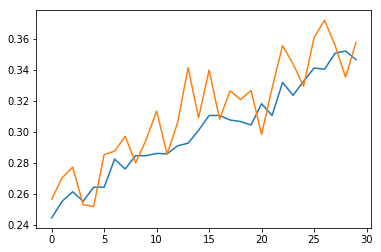

In [11]:
plt.plot(mod1.history['acc'])
plt.plot(mod1.history['val_acc'])

In [12]:
mod2 = motion_model.fit_generator(generator=training_generator, steps_per_epoch=32, 
                    validation_data=validation_generator, validation_steps=32,
                    use_multiprocessing=True,
                    workers=2, epochs=30,
                    verbose=1)

Epoch 1/30
32/32 [==============================] - 52s 2s/step - loss: 1.8527 - acc: 0.3728 - val_loss: 1.8951 - val_acc: 0.3660
Epoch 2/30
32/32 [==============================] - 52s 2s/step - loss: 1.8493 - acc: 0.3577 - val_loss: 1.8659 - val_acc: 0.3850
Epoch 3/30
32/32 [==============================] - 49s 2s/step - loss: 1.8697 - acc: 0.3496 - val_loss: 1.9806 - val_acc: 0.3213
Epoch 4/30
32/32 [==============================] - 53s 2s/step - loss: 1.8537 - acc: 0.3645 - val_loss: 1.8316 - val_acc: 0.3855
Epoch 5/30
32/32 [==============================] - 51s 2s/step - loss: 1.8223 - acc: 0.3738 - val_loss: 1.8895 - val_acc: 0.3452
Epoch 6/30
32/32 [==============================] - 50s 2s/step - loss: 1.8072 - acc: 0.3916 - val_loss: 1.8622 - val_acc: 0.3699
Epoch 7/30
32/32 [==============================] - 49s 2s/step - loss: 1.8305 - acc: 0.3828 - val_loss: 1.9807 - val_acc: 0.3091
Epoch 8/30
32/32 [==============================] - 48s 2s/step - loss: 1.8092 - acc: 0.39

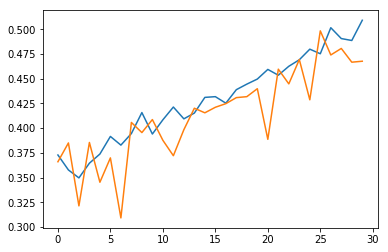

In [13]:
plt.plot(mod2.history['acc'])
plt.plot(mod2.history['val_acc'])

In [14]:
mod3 = motion_model.fit_generator(generator=training_generator, steps_per_epoch=32, 
                    validation_data=validation_generator, validation_steps=64,
                    use_multiprocessing=True,
                    workers=2, epochs=30,
                    verbose=1)

Epoch 1/30
32/32 [==============================] - 67s 2s/step - loss: 1.5446 - acc: 0.5088 - val_loss: 1.6653 - val_acc: 0.4410
Epoch 2/30
32/32 [==============================] - 64s 2s/step - loss: 1.5600 - acc: 0.4978 - val_loss: 1.5902 - val_acc: 0.4940
Epoch 3/30
32/32 [==============================] - 64s 2s/step - loss: 1.5422 - acc: 0.5066 - val_loss: 1.5545 - val_acc: 0.4995
Epoch 4/30
32/32 [==============================] - 68s 2s/step - loss: 1.5292 - acc: 0.5227 - val_loss: 1.5537 - val_acc: 0.5067
Epoch 5/30
32/32 [==============================] - 64s 2s/step - loss: 1.5301 - acc: 0.5208 - val_loss: 1.5005 - val_acc: 0.5214
Epoch 6/30
32/32 [==============================] - 67s 2s/step - loss: 1.4903 - acc: 0.5242 - val_loss: 1.5223 - val_acc: 0.5017
Epoch 7/30
32/32 [==============================] - 66s 2s/step - loss: 1.4724 - acc: 0.5310 - val_loss: 1.5255 - val_acc: 0.4993
Epoch 8/30
32/32 [==============================] - 61s 2s/step - loss: 1.5141 - acc: 0.52

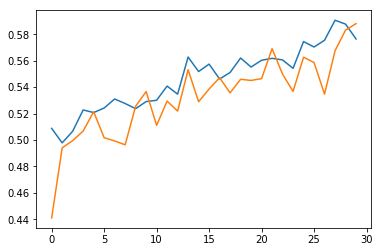

In [15]:
plt.plot(mod3.history['acc'])
plt.plot(mod3.history['val_acc'])

In [16]:
motion_model2=getSimonyanOxfordModel((224,224,2), 10, dropout=0, printmod=0)

In [17]:
motion_model.save_weights('/data/su_buildup/two_stream_part2/data/weights/motion_model_10_class_simonyan.hdf5')

In [18]:
motion_model2.load_weights('/data/su_buildup/two_stream_part2/data/weights/motion_model_10_class_simonyan.hdf5')

In [19]:
mypotim = SGD(lr=1e-3, momentum=0.9)
motion_model2.compile(loss='categorical_crossentropy',
              optimizer=mypotim,
              metrics=['accuracy'])

In [20]:
mod4 = motion_model2.fit_generator(generator=training_generator, steps_per_epoch=32, 
                    validation_data=validation_generator, validation_steps=64,
                    use_multiprocessing=True,
                    workers=2, epochs=30,
                    verbose=1)

Epoch 1/30
32/32 [==============================] - 64s 2s/step - loss: 1.2550 - acc: 0.6033 - val_loss: 1.3015 - val_acc: 0.5907
Epoch 2/30
32/32 [==============================] - 66s 2s/step - loss: 1.2349 - acc: 0.6133 - val_loss: 1.3074 - val_acc: 0.5936
Epoch 3/30
32/32 [==============================] - 62s 2s/step - loss: 1.2546 - acc: 0.6101 - val_loss: 1.2948 - val_acc: 0.5940
Epoch 4/30
32/32 [==============================] - 65s 2s/step - loss: 1.2312 - acc: 0.6162 - val_loss: 1.2997 - val_acc: 0.5922
Epoch 5/30
32/32 [==============================] - 63s 2s/step - loss: 1.2535 - acc: 0.6106 - val_loss: 1.2969 - val_acc: 0.5983
Epoch 6/30
32/32 [==============================] - 65s 2s/step - loss: 1.2036 - acc: 0.6169 - val_loss: 1.2701 - val_acc: 0.6096
Epoch 7/30
32/32 [==============================] - 66s 2s/step - loss: 1.2294 - acc: 0.6211 - val_loss: 1.2582 - val_acc: 0.6090
Epoch 8/30
32/32 [==============================] - 63s 2s/step - loss: 1.2165 - acc: 0.61

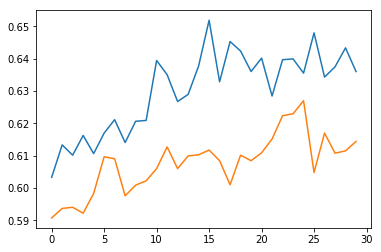

In [21]:
plt.plot(mod4.history['acc'])
plt.plot(mod4.history['val_acc'])

In [22]:
mod5 = motion_model.fit_generator(generator=training_generator, steps_per_epoch=32, 
                    validation_data=validation_generator, validation_steps=64,
                    use_multiprocessing=True,
                    workers=2, epochs=30,
                    verbose=1)

Epoch 1/30
32/32 [==============================] - 65s 2s/step - loss: 1.3598 - acc: 0.5789 - val_loss: 1.3634 - val_acc: 0.5753
Epoch 2/30
32/32 [==============================] - 65s 2s/step - loss: 1.2871 - acc: 0.5940 - val_loss: 1.4003 - val_acc: 0.5583
Epoch 3/30
32/32 [==============================] - 63s 2s/step - loss: 1.3826 - acc: 0.5652 - val_loss: 1.3472 - val_acc: 0.5751
Epoch 4/30
32/32 [==============================] - 67s 2s/step - loss: 1.3175 - acc: 0.5913 - val_loss: 1.3397 - val_acc: 0.5669
Epoch 5/30
32/32 [==============================] - 62s 2s/step - loss: 1.2936 - acc: 0.5996 - val_loss: 1.4222 - val_acc: 0.5585
Epoch 6/30
32/32 [==============================] - 63s 2s/step - loss: 1.3083 - acc: 0.5903 - val_loss: 1.3606 - val_acc: 0.5760
Epoch 7/30
32/32 [==============================] - 64s 2s/step - loss: 1.2984 - acc: 0.6016 - val_loss: 1.4092 - val_acc: 0.5483
Epoch 8/30
32/32 [==============================] - 62s 2s/step - loss: 1.3250 - acc: 0.59

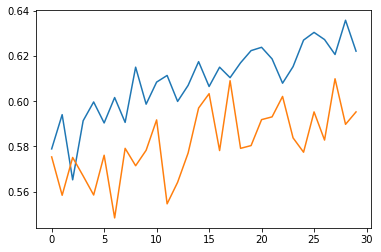

In [23]:
plt.plot(mod5.history['acc'])
plt.plot(mod5.history['val_acc'])

In [24]:
mod6 = motion_model2.fit_generator(generator=training_generator, steps_per_epoch=32, 
                    validation_data=validation_generator, validation_steps=64,
                    use_multiprocessing=True,
                    workers=2, epochs=40,
                    verbose=1)

Epoch 1/40
32/32 [==============================] - 67s 2s/step - loss: 1.1152 - acc: 0.6572 - val_loss: 1.1998 - val_acc: 0.6234
Epoch 2/40
32/32 [==============================] - 65s 2s/step - loss: 1.1424 - acc: 0.6479 - val_loss: 1.2226 - val_acc: 0.6167
Epoch 3/40
32/32 [==============================] - 63s 2s/step - loss: 1.1354 - acc: 0.6467 - val_loss: 1.2142 - val_acc: 0.6255
Epoch 4/40
32/32 [==============================] - 67s 2s/step - loss: 1.1320 - acc: 0.6550 - val_loss: 1.2113 - val_acc: 0.6169
Epoch 5/40
32/32 [==============================] - 65s 2s/step - loss: 1.1343 - acc: 0.6499 - val_loss: 1.2024 - val_acc: 0.6163
Epoch 6/40
32/32 [==============================] - 67s 2s/step - loss: 1.1064 - acc: 0.6550 - val_loss: 1.1879 - val_acc: 0.6311
Epoch 7/40
32/32 [==============================] - 66s 2s/step - loss: 1.1210 - acc: 0.6562 - val_loss: 1.2184 - val_acc: 0.6240
Epoch 8/40
32/32 [==============================] - 62s 2s/step - loss: 1.1257 - acc: 0.65

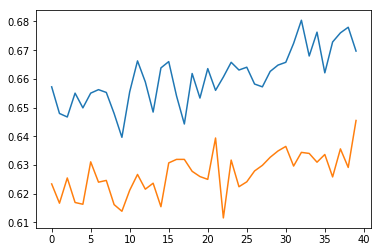

In [25]:
plt.plot(mod6.history['acc'])
plt.plot(mod6.history['val_acc'])

In [26]:
mod7 = motion_model2.fit_generator(generator=training_generator, steps_per_epoch=32, 
                    validation_data=validation_generator, validation_steps=64,
                    use_multiprocessing=True,
                    workers=2, epochs=50,
                    verbose=1)

Epoch 1/50
32/32 [==============================] - 66s 2s/step - loss: 1.0657 - acc: 0.6729 - val_loss: 1.1720 - val_acc: 0.6295
Epoch 2/50
32/32 [==============================] - 67s 2s/step - loss: 1.0867 - acc: 0.6689 - val_loss: 1.1771 - val_acc: 0.6292
Epoch 3/50
32/32 [==============================] - 62s 2s/step - loss: 1.0846 - acc: 0.6724 - val_loss: 1.1695 - val_acc: 0.6293
Epoch 4/50
32/32 [==============================] - 67s 2s/step - loss: 1.0618 - acc: 0.6824 - val_loss: 1.1865 - val_acc: 0.6350
Epoch 5/50
32/32 [==============================] - 62s 2s/step - loss: 1.0965 - acc: 0.6611 - val_loss: 1.1430 - val_acc: 0.6410
Epoch 6/50
32/32 [==============================] - 65s 2s/step - loss: 1.0698 - acc: 0.6641 - val_loss: 1.1436 - val_acc: 0.6385
Epoch 7/50
32/32 [==============================] - 63s 2s/step - loss: 1.0772 - acc: 0.6802 - val_loss: 1.1481 - val_acc: 0.6378
Epoch 8/50
32/32 [==============================] - 63s 2s/step - loss: 1.0387 - acc: 0.68

Process ForkPoolWorker-11497:
Process ForkPoolWorker-11498:
Process ForkPoolWorker-11529:
Process ForkPoolWorker-11530:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/l

KeyboardInterrupt: 

In [27]:
motion_model2.save_weights('/data/su_buildup/two_stream_part2/data/weights/motion_model_10_class_simonyan.hdf5')

In [14]:
predict = np.empty((len(validation_generator)*128*4, 10), dtype=float)
labels = np.empty((len(validation_generator)*128*4, 10), dtype=int)
predict.shape

(1536, 10)

In [15]:

for i, (X, y) in enumerate(validation_generator):
    predict[i*128:(i+1)*128,] = motion_model3.predict(X)
    labels[i*128:(i+1)*128] = y
    if i == len(validation_generator)*4 - 1:
        break


In [17]:
rounded_predictions = predict.argmax(axis=1)
rounded_labels = labels.argmax(axis=1)
from sklearn.metrics import confusion_matrix

Confusion matrix, without normalization
[[103  40  20   5   0   0   1   0   0   3]
 [ 17 104   6   1   0   0   0   0   0   0]
 [ 18  16  51  30   5   6  19   4   0  15]
 [ 12   8  16  90   1   0   5   4   0   4]
 [  0   4  16   8  82   0   7   5   1   1]
 [  1   4  16   6   0 136   0   6   0   3]
 [  0   4  37   5   2   0  85  16   2   9]
 [  3   6  34   4   4   6  40  37   2   4]
 [  0   1   6   3   0   2   0   3 133   0]
 [  2   0   9   3   0   0   2   6   0 166]]


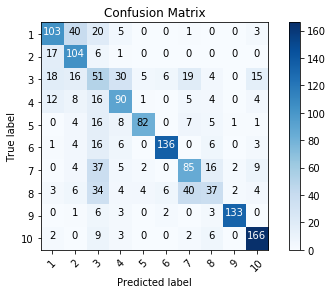

In [18]:
from ucf101_data_utils import plot_confusion_matrix

cm = confusion_matrix(rounded_labels, rounded_predictions)
cm_plot_labels = [str(i) for i in range(1,11)]
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix', normalize=False)

# Basketball/Baseball/Archery confusion??

In [71]:
img1 = cv2.imread('/data/tvl1_flow/u/v_Basketball_g03_c04/frame000013.jpg', 0)

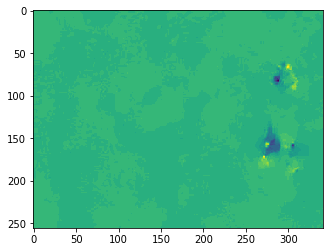

In [72]:
plt.imshow(img1)

In [73]:
img2 = cv2.imread('/data/tvl1_flow/u/v_BaseballPitch_g07_c03/frame000038.jpg', 0)

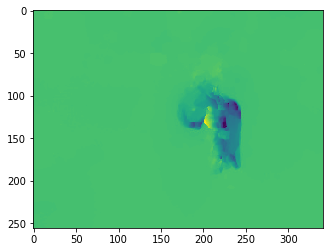

In [74]:
plt.imshow(img2)

In [127]:
img3 = cv2.imread('/data/tvl1_flow/u/v_Archery_g01_c04/frame000028.jpg', 0)

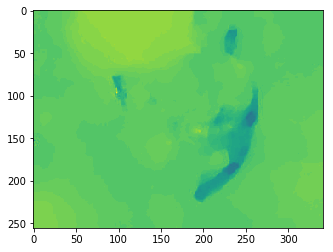

In [128]:
plt.imshow(img3)

## Everybody's looks like a bow and arrow?

In [138]:
images = np.empty((len(validation_generator)*128*4, 224,224,2), dtype=float)
for i, (X, y) in enumerate(validation_generator):
    images[i*128:(i+1)*128,] = X
    predict[i*128:(i+1)*128,] = motion_model2.predict(X)
    labels[i*128:(i+1)*128] = y
    if i == len(validation_generator)*4 - 1:
        break

In [161]:
bow_arrow_indexes = np.where(rounded_predictions == 2)

In [162]:
images_reslt = images[bow_arrow_indexes[0],:]

In [163]:
images_reslt.shape

(206, 224, 224, 2)

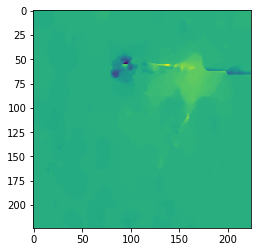

In [167]:
plt.imshow(images_reslt[19,:,:,1])

In [170]:
motion_model2.predict(images_reslt[19,:,:,:].reshape(1,224,224,2))

array([[0.01271269, 0.0012586 , 0.5566754 , 0.08381549, 0.12933613,
        0.00262067, 0.14869656, 0.03980516, 0.00075456, 0.02432475]],
      dtype=float32)

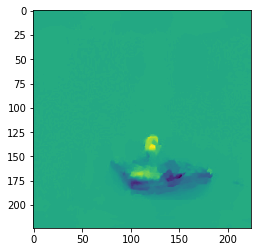

In [171]:
plt.imshow(images_reslt[10,:,:,1])

In [172]:
motion_model2.predict(images_reslt[10,:,:,:].reshape(1,224,224,2))

array([[0.27738538, 0.3881533 , 0.135097  , 0.01759669, 0.00465097,
        0.0066815 , 0.03691467, 0.03541503, 0.0015256 , 0.0965798 ]],
      dtype=float32)

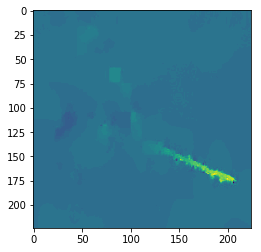

In [174]:
plt.imshow(images_reslt[44,:,:,1])

In [175]:
motion_model2.predict(images_reslt[44,:,:,:].reshape(1,224,224,2))

array([[3.6864415e-02, 1.2106004e-02, 2.8094479e-01, 1.1733476e-02,
        5.7052947e-03, 1.6453161e-03, 1.5377566e-01, 3.5899628e-02,
        4.5458859e-04, 4.6087080e-01]], dtype=float32)

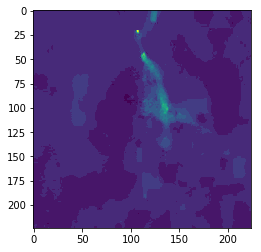

In [186]:
plt.imshow(images_reslt[11,:,:,1])

In [187]:
motion_model2.predict(images_reslt[11,:,:,:].reshape(1,224,224,2))

array([[0.1613494 , 0.00592306, 0.38494867, 0.23043434, 0.08038078,
        0.00213379, 0.10314684, 0.01748323, 0.00150948, 0.0126904 ]],
      dtype=float32)

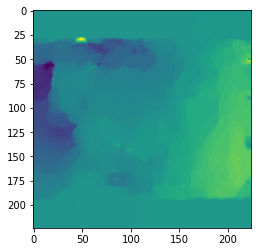

In [192]:
plt.imshow(images_reslt[23,:,:,1])

In [193]:
motion_model2.predict(images_reslt[23,:,:,:].reshape(1,224,224,2))

array([[0.00669234, 0.02499308, 0.02962913, 0.852714  , 0.01652546,
        0.00610948, 0.00338535, 0.03383562, 0.01146185, 0.01465361]],
      dtype=float32)

In [8]:
motion_model3=getSimonyanOxfordModel((224,224,2), 10, dropout=0, printmod=0)

In [9]:
motion_model3.load_weights('/data/su_buildup/two_stream_part2/data/weights/motion_model_10_class_simonyan.hdf5')

In [10]:
mypotim = SGD(lr=1e-4, momentum=0.9)
motion_model3.compile(loss='categorical_crossentropy',
              optimizer=mypotim,
              metrics=['accuracy'])

In [12]:
mod8 = motion_model3.fit_generator(generator=training_generator, steps_per_epoch=32, 
                    validation_data=validation_generator, validation_steps=64,
                    use_multiprocessing=True,
                    workers=4, epochs=30,
                    verbose=1)

Epoch 1/30
32/32 [==============================] - 48s 2s/step - loss: 1.0031 - acc: 0.6982 - val_loss: 1.1351 - val_acc: 0.6449
Epoch 2/30
32/32 [==============================] - 48s 1s/step - loss: 1.0067 - acc: 0.6990 - val_loss: 1.1175 - val_acc: 0.6498
Epoch 3/30
32/32 [==============================] - 44s 1s/step - loss: 0.9986 - acc: 0.6924 - val_loss: 1.1286 - val_acc: 0.6460
Epoch 4/30
32/32 [==============================] - 47s 1s/step - loss: 0.9711 - acc: 0.7104 - val_loss: 1.1212 - val_acc: 0.6515
Epoch 5/30
32/32 [==============================] - 44s 1s/step - loss: 1.0074 - acc: 0.6970 - val_loss: 1.1199 - val_acc: 0.6499
Epoch 6/30
32/32 [==============================] - 47s 1s/step - loss: 1.0059 - acc: 0.6926 - val_loss: 1.1082 - val_acc: 0.6531
Epoch 7/30
32/32 [==============================] - 45s 1s/step - loss: 1.0093 - acc: 0.6912 - val_loss: 1.1207 - val_acc: 0.6514
Epoch 8/30
32/32 [==============================] - 43s 1s/step - loss: 0.9905 - acc: 0.70

In [13]:
motion_model3.save_weights('/data/su_buildup/two_stream_part2/data/weights/motion_model_10_class_simonyan_p2.hdf5')